# Importation of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SK_LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
class LogisticRegression():
    def __init__(self, learning_rate=0.001, epochs=100000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.theta = None
        self.costs = []
        self.B = 0

    def g(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.X = X
        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []
        for epoch in range(self.epochs):
            Z = np.dot(X, self.theta)
            y_pred = self.g(Z)
            cost = -(1/m)*np.sum( y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            error = y_pred - y
            d_theta = (1/m) * np.dot(X.T, error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.costs.append(cost)
            prev_cost = cost

    def optimized_fit(self, X, y):
        self.X = X
        self.theta = np.zeros((X.shape[1], 1))
        m, n = X.shape
        prev_cost = float('inf')
        self.costs = []
        self.B = 0
        for epoch in range(self.epochs):
            Z = np.dot(X, self.theta) + self.B
            y_pred = self.g(Z)
            cost = -(1/m)*np.sum( y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            error = y_pred - y
            d_theta = (1/m) * np.dot(X.T, error)
            d_B = (1/m) * np.sum(error)
            self.theta = self.theta - self.learning_rate * d_theta
            self.B = self.B - self.learning_rate * d_B
            self.costs.append(cost)
            prev_cost = cost

    def plot_error_history(self):
        plt.plot(np.arange(1,len(self.costs) + 1), self.costs)
        plt.xlabel('Number of epochs')
        plt.ylabel('Cost')
        plt.title('MSE vs Epochs')
        plt.show()

    def predict(self, X):
        Z = np.dot(X, self.theta) + self.B
        y_pred = self.g(Z)
        y_pred = y_pred > 0.5
        y_pred = np.array(y_pred, dtype="int64")
        return y_pred

In [3]:
class MinMaxScaler():
    def __init__(self):
        self.min_val = None
        self.max_val = None

    def fit(self, X):
        self.min_val = X.min(axis=0)
        self.max_val = X.max(axis=0)

    def transform(self, X):
        if self.min_val is None or self.max_val is None:
            raise ValueError("You must fit before transform")
        X_scaled = (X - self.min_val) / (self.max_val - self.min_val)
        return X_scaled

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [4]:
def plot_cm(cm):
    import itertools
    plt.figure(figsize=(6, 4))
    plt.imshow(cm, cmap='Blues', interpolation='nearest')
    plt.colorbar()
    plt.title('Confusion Matrix')
    plt.xticks([0, 1], ['No purchase', 'Purchase'])
    plt.yticks([0, 1], ['No purchase', 'Purchase'])

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]}', horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [5]:
def plot_mesh_grid(X, y, clf, xlabel="", ylabel="", title=""):
    from matplotlib.colors import ListedColormap
    X_set, y_set = X, y
    y_set = y_set.ravel()
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    Z = clf.predict(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    padding = 0.95
    plt.xlim(X1.min() + padding, X1.max() - padding)
    plt.ylim(X2.min()+ padding, X2.max() - padding)
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color = ListedColormap(('red', 'green'))(i), label = j)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [6]:
def accuracy(cm):
    return (cm[0,0] + cm[1,1])/(cm[0,0] + cm[0,1] + cm[1,1] + cm[1,0])

In [7]:
def experiment_with_train_size(X, y):
    def plot_accuracy_bars(a, b):
        tags = ['70% vs 30%', '50% vs 50%', '30% vs 70%']
        width = 0.3
        x = np.arange(len(tags))
        font_size = 10

        plt.bar(x - width/2, a, width=width, label='Implemented Model')
        plt.bar(x + width/2, b, width=width, label='Sklearn Model')

        for xi, ai, bi in zip(x, a, b):
            plt.text(xi - width/2, ai, '%.2f' % ai, ha='center', va='bottom', fontsize=font_size)
            plt.text(xi + width/2, bi, '%.2f' % bi, ha='center', va='bottom', fontsize=font_size)

        plt.xticks(x, tags)
        plt.legend(loc='lower left')
        plt.xlabel("Train size vs Test size")
        plt.ylabel("Accuracy")
        plt.title("Accuracy comparison (Implemented model vs Sklearn model)" )
        plt.show()

    train_sizes = [0.7, 0.5, 0.3]
    accuracy_proposed_model = []
    accuracy_sklearn_model = []
    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=0)

        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = LogisticRegression(0.01, 150000)
        model.optimized_fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model.plot_error_history()
        cm = confusion_matrix(y_test, y_pred)
        model_accuracy = accuracy(cm)

        sklearn_model = SK_LogisticRegression()
        sklearn_model.fit(X_train, y_train.ravel())
        y_pred = sklearn_model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        sklearn_accuracy = accuracy(cm)

        accuracy_proposed_model.append(model_accuracy)
        accuracy_sklearn_model.append(sklearn_accuracy)

    plot_accuracy_bars(accuracy_proposed_model, accuracy_sklearn_model)

# Read dataset

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/RayverAimar/machine-learning-scripts/master/3%20-%20Classification/Section%2014%20-%20Logistic%20Regression/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
X = df.iloc[:,2:4].values
y = df.iloc[:,-1].values.reshape(-1,1)

In [11]:
X.shape, y.shape

((400, 2), (400, 1))

# Split data into train and test sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 2), (100, 2), (300, 1), (100, 1))

# Normalization

In [14]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

## Scikit-Learn Model

In [15]:
sklearn_model = SK_LogisticRegression(random_state=0)
sklearn_model.fit(X_train, y_train.ravel())

LogisticRegression(random_state=0)

### Confusion Matrix

In [16]:
y_pred = sklearn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy Scikit-Learn Model: {accuracy(cm)}")

Accuracy Scikit-Learn Model: 0.890000


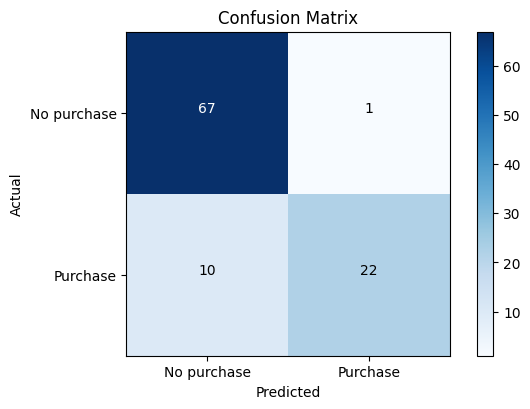

In [17]:
plot_cm(cm)

### Graphic Representation

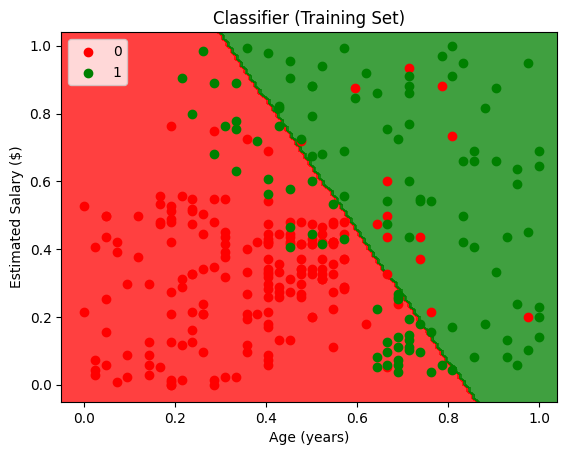

In [18]:
plot_mesh_grid(X_train, y_train, clf=sklearn_model, xlabel="Age (years)", ylabel="Estimated Salary ($)", title="Classifier (Training Set)")

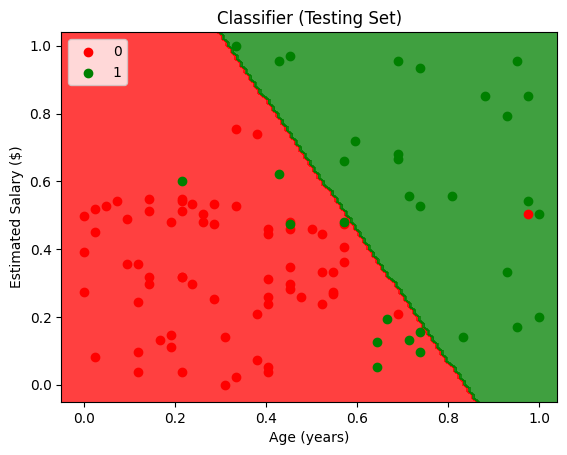

In [19]:
plot_mesh_grid(X_test, y_test, clf=sklearn_model, xlabel="Age (years)", ylabel="Estimated Salary ($)", title="Classifier (Testing Set)")

## Implemented Model

In [20]:
model = LogisticRegression(learning_rate=0.01, epochs=150000)
model.fit(X_train, y_train)

### Graphic Representation of Cost History

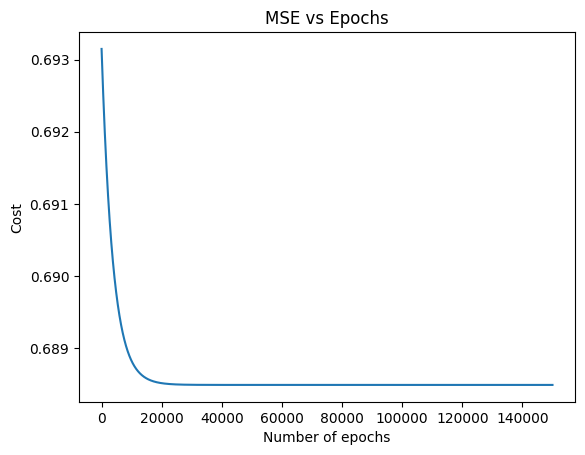

In [21]:
model.plot_error_history()

### Confusion Matrix

In [22]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy Implemented Model: {accuracy(cm)}")

Accuracy Implemented Model: 0.540000


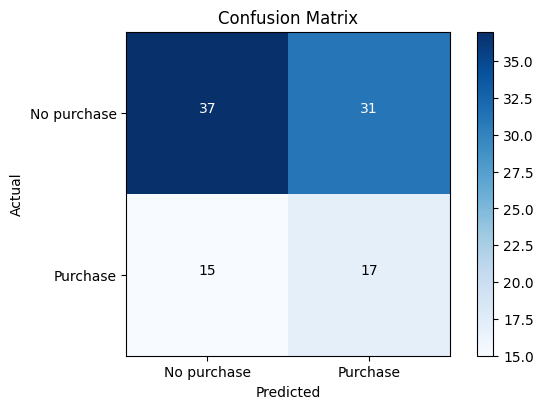

In [23]:
plot_cm(cm)

### Graphic Representation

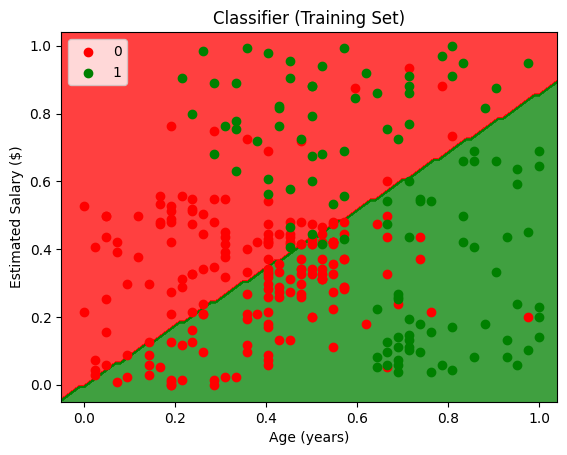

In [24]:
plot_mesh_grid(X_train, y_train, clf=model, xlabel="Age (years)", ylabel="Estimated Salary ($)", title="Classifier (Training Set)")

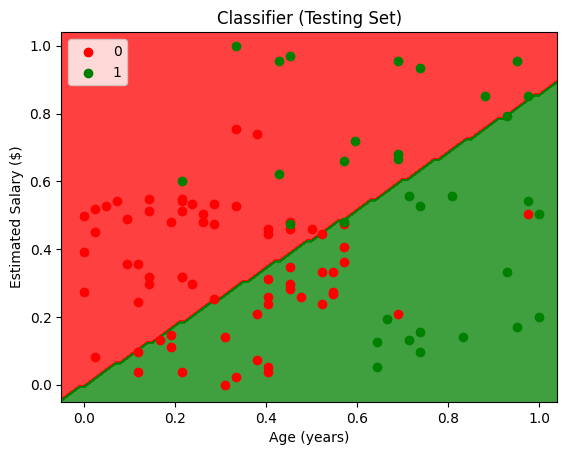

In [25]:
plot_mesh_grid(X_test, y_test, clf=model, xlabel="Age (years)", ylabel="Estimated Salary ($)", title="Classifier (Testing Set)")

In [26]:
## Some theory jeh

In [27]:
model = LogisticRegression(learning_rate=0.01, epochs=150000)
model.optimized_fit(X_train, y_train)

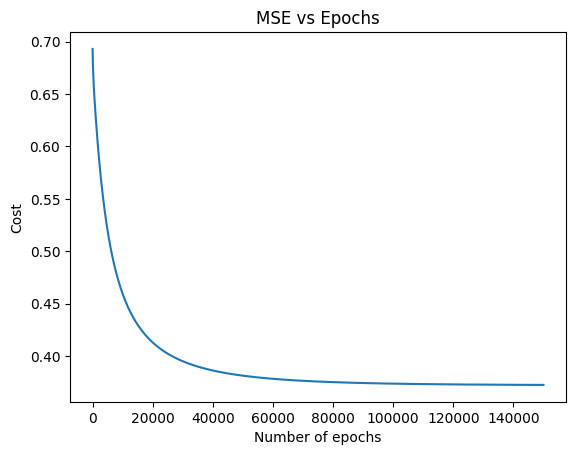

In [28]:
model.plot_error_history()

In [29]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy Implemented Model: {accuracy(cm)}")

Accuracy Implemented Model: 0.890000


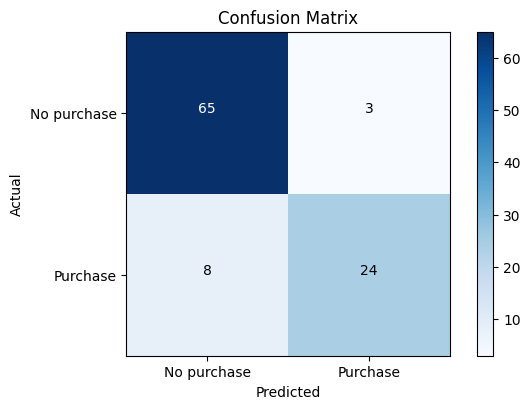

In [30]:
plot_cm(cm)

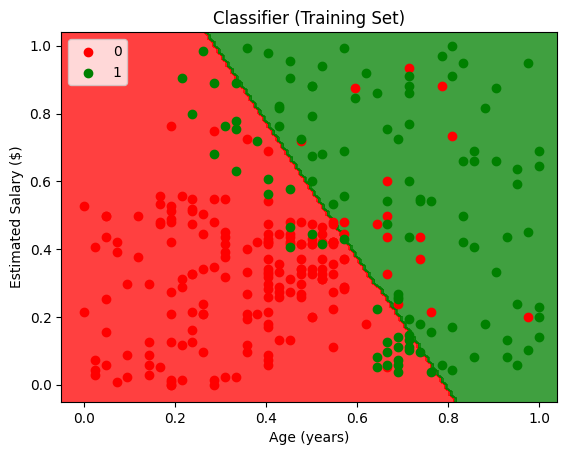

In [31]:
plot_mesh_grid(X_train, y_train, clf=model, xlabel="Age (years)", ylabel="Estimated Salary ($)", title="Classifier (Training Set)")

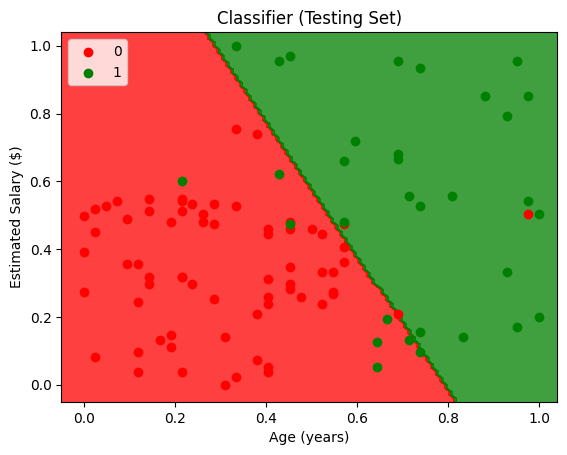

In [32]:
plot_mesh_grid(X_test, y_test, clf=model, xlabel="Age (years)", ylabel="Estimated Salary ($)", title="Classifier (Testing Set)")

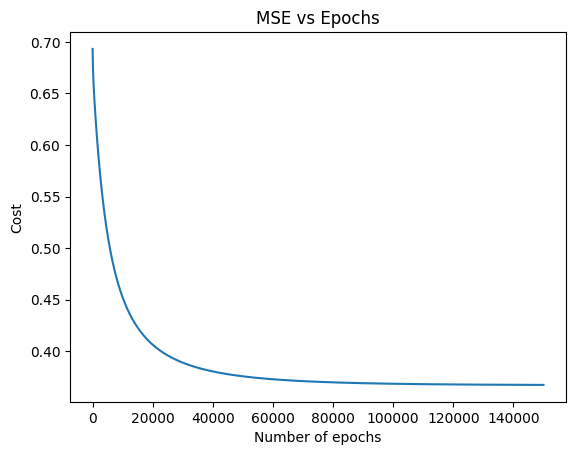

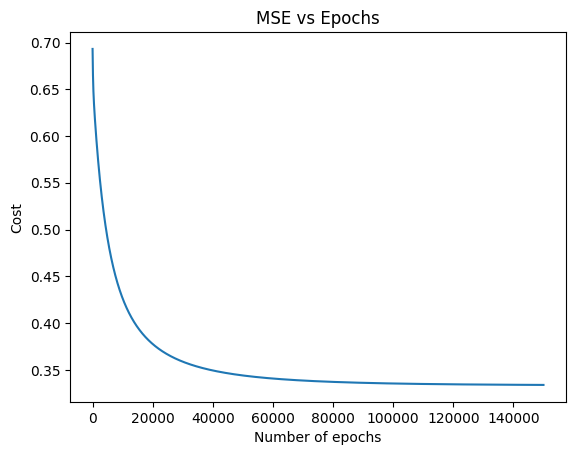

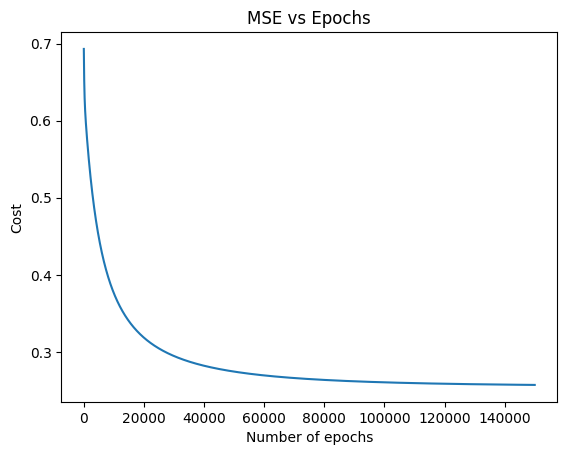

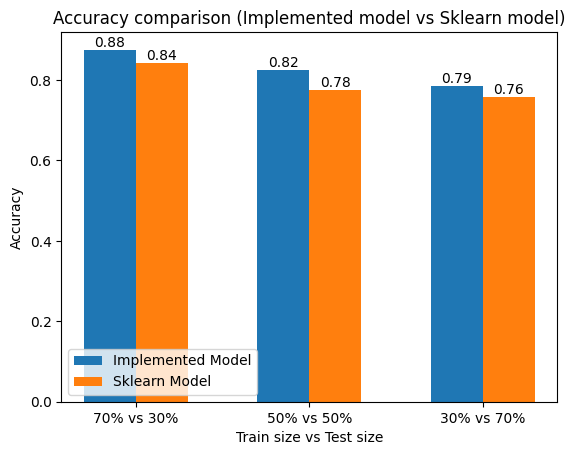

In [33]:
experiment_with_train_size(X,y)